In [1]:
# ! pip install --upgrade bottleneck

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
apt23 = pd.read_csv('data_yena/아파트(전월세)_실거래가_2023.csv', header=15, encoding='cp949')
apt24 = pd.read_csv('data_yena/아파트(전월세)_실거래가_2024.csv', header=15, encoding='cp949')

In [4]:
apt23 = pd.read_csv('data_yena/아파트(전월세)_실거래가_2023.csv', header=15, encoding='cp949')
apt24 = pd.read_csv('data_yena/아파트(전월세)_실거래가_2024.csv', header=15, encoding='cp949')

## 전처리

In [5]:
apt23_df = apt23[apt23['전월세구분']=='전세']
apt24_df = apt24[apt24['전월세구분']=='전세']

In [6]:
apt23_df['월세금(만원)'] = apt23_df['월세금(만원)'].str.replace(',', '').astype(int)
apt24_df['월세금(만원)'] = apt24_df['월세금(만원)'].str.replace(',', '').astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_21120\3222935364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['월세금(만원)'] = apt23_df['월세금(만원)'].str.replace(',', '').astype(int)
C:\Users\emily\AppData\Local\Temp\ipykernel_21120\3222935364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['월세금(만원)'] = apt24_df['월세금(만원)'].str.replace(',', '').astype(int)


In [7]:
apt23_df['보증금(만원)'] = apt23_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
apt23_df['보증금(만원)'] = pd.to_numeric(apt23_df['보증금(만원)']).astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_21120\760281986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['보증금(만원)'] = apt23_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_21120\760281986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['보증금(만원)'] = pd.to_numeric(apt23_df['보증금(만원)']).astype(int)


In [8]:
apt24_df['보증금(만원)'] = apt24_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
apt24_df['보증금(만원)'] = pd.to_numeric(apt24_df['보증금(만원)']).astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_21120\3453946786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['보증금(만원)'] = apt24_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_21120\3453946786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['보증금(만원)'] = pd.to_numeric(apt24_df['보증금(만원)']).astype(int)


In [9]:
apt23_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165859 entries, 0 to 283326
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NO            165859 non-null  int64  
 1   시군구           165859 non-null  object 
 2   번지            165859 non-null  object 
 3   본번            165859 non-null  int64  
 4   부번            165859 non-null  int64  
 5   단지명           165859 non-null  object 
 6   전월세구분         165859 non-null  object 
 7   전용면적(㎡)       165859 non-null  float64
 8   계약년월          165859 non-null  int64  
 9   계약일           165859 non-null  int64  
 10  보증금(만원)       165859 non-null  int32  
 11  월세금(만원)       165859 non-null  int32  
 12  층             165859 non-null  int64  
 13  건축년도          165859 non-null  int64  
 14  도로명           165859 non-null  object 
 15  계약기간          165859 non-null  object 
 16  계약구분          165859 non-null  object 
 17  갱신요구권 사용      165859 non-null  object 
 18  종전계약 보증금(

In [10]:
apt23['전용면적(㎡)'].describe()

count    283327.000000
mean         69.525657
std          29.202173
min          10.321500
25%          51.030000
50%          59.990000
75%          84.930000
max         314.800000
Name: 전용면적(㎡), dtype: float64

In [11]:
apt23_df['계약년월'] = pd.to_datetime(apt23_df['계약년월'].astype(str), format='%Y%m')
apt24_df['계약년월'] = pd.to_datetime(apt24_df['계약년월'].astype(str), format='%Y%m')

C:\Users\emily\AppData\Local\Temp\ipykernel_21120\2180389127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['계약년월'] = pd.to_datetime(apt23_df['계약년월'].astype(str), format='%Y%m')
C:\Users\emily\AppData\Local\Temp\ipykernel_21120\2180389127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['계약년월'] = pd.to_datetime(apt24_df['계약년월'].astype(str), format='%Y%m')


In [12]:
apt23_df = apt23_df[apt23_df['계약년월']>='2023-06-01']
apt23_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형
0,1,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,2023-12-01,31,...,0,2,1999,동호로10길 30,202402~202602,신규,-,NaN,NaN,아파트
4,5,서울특별시 용산구 이촌동,395,395,0,대림,전세,59.22,2023-12-01,31,...,0,20,1994,이촌로2가길 122,202403~202603,신규,-,NaN,NaN,아파트
5,6,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,0,7,2010,백범로 260,-,-,-,NaN,NaN,아파트
6,7,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,0,7,2010,백범로 260,202402~202602,신규,-,NaN,NaN,아파트
9,10,서울특별시 성동구 금호동2가,1,1,0,신금호파크자이,전세,59.98,2023-12-01,31,...,0,14,2016,금호로 173,-,-,-,NaN,NaN,아파트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157615,157616,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,84.91,2023-06-01,1,...,0,6,1990,사당로17길 52,202307~202507,갱신,사용,"72,000",0,아파트
157616,157617,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,125.40,2023-06-01,1,...,0,13,1990,사당로17길 52,202308~202508,신규,-,NaN,NaN,아파트
157620,157621,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,0,39,2017,천호대로 1077,202308~202508,신규,-,NaN,NaN,아파트
157621,157622,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,0,39,2017,천호대로 1077,202308~202509,신규,-,NaN,NaN,아파트


In [13]:
apt23_df['종전계약 보증금(만원)'] = apt23_df['종전계약 보증금(만원)'].fillna(0)

In [14]:
apt24_df['종전계약 보증금(만원)'] = apt24_df['종전계약 보증금(만원)'].fillna(0)

C:\Users\emily\AppData\Local\Temp\ipykernel_21120\592426881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['종전계약 보증금(만원)'] = apt24_df['종전계약 보증금(만원)'].fillna(0)


In [15]:
apt23_df['계약구분'] = apt23_df['계약구분'].replace('-', '신규')
apt23_df['계약구분'].value_counts()

계약구분
신규    68394
갱신    24926
Name: count, dtype: int64

In [16]:
apt24_df['계약구분'] = apt24_df['계약구분'].replace('-', '신규')
apt24_df['계약구분'].value_counts()

C:\Users\emily\AppData\Local\Temp\ipykernel_21120\1033885567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['계약구분'] = apt24_df['계약구분'].replace('-', '신규')


계약구분
신규    98162
갱신    45707
Name: count, dtype: int64

In [17]:
apt23_df[(apt23_df['계약구분']=='신규')&(apt23_df['종전계약 보증금(만원)'] != 0)]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형


In [18]:
apt24_df[(apt24_df['계약구분']=='신규')&(apt24_df['종전계약 보증금(만원)'] != 0)]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형


In [19]:
apt23_df = apt23_df[apt23_df['계약구분']=='신규']
apt24_df = apt24_df[apt24_df['계약구분']=='신규']

## 자치구별 평균 전세 보증금

In [20]:
apt23_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형
0,1,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,2023-12-01,31,...,0,2,1999,동호로10길 30,202402~202602,신규,-,0,NaN,아파트
4,5,서울특별시 용산구 이촌동,395,395,0,대림,전세,59.22,2023-12-01,31,...,0,20,1994,이촌로2가길 122,202403~202603,신규,-,0,NaN,아파트
5,6,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,0,7,2010,백범로 260,-,신규,-,0,NaN,아파트
6,7,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,0,7,2010,백범로 260,202402~202602,신규,-,0,NaN,아파트
9,10,서울특별시 성동구 금호동2가,1,1,0,신금호파크자이,전세,59.98,2023-12-01,31,...,0,14,2016,금호로 173,-,신규,-,0,NaN,아파트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157613,157614,서울특별시 서초구 방배동,2525,2525,0,방배우성,전세,117.19,2023-06-01,1,...,0,7,1991,방배선행길 1,202309~202509,신규,-,0,NaN,아파트
157616,157617,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,125.40,2023-06-01,1,...,0,13,1990,사당로17길 52,202308~202508,신규,-,0,NaN,아파트
157620,157621,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,0,39,2017,천호대로 1077,202308~202508,신규,-,0,NaN,아파트
157621,157622,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,0,39,2017,천호대로 1077,202308~202509,신규,-,0,NaN,아파트


In [21]:
apt23_df['구'] = apt23_df['시군구'].str.extract(r'(\S+구)')
apt23_df

C:\Users\emily\AppData\Local\Temp\ipykernel_21120\2471316189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['구'] = apt23_df['시군구'].str.extract(r'(\S+구)')


,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,구
0,1,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,2023-12-01,31,...,2,1999,동호로10길 30,202402~202602,신규,-,0,NaN,아파트,중구
4,5,서울특별시 용산구 이촌동,395,395,0,대림,전세,59.22,2023-12-01,31,...,20,1994,이촌로2가길 122,202403~202603,신규,-,0,NaN,아파트,용산구
5,6,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,7,2010,백범로 260,-,신규,-,0,NaN,아파트,용산구
6,7,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,7,2010,백범로 260,202402~202602,신규,-,0,NaN,아파트,용산구
9,10,서울특별시 성동구 금호동2가,1,1,0,신금호파크자이,전세,59.98,2023-12-01,31,...,14,2016,금호로 173,-,신규,-,0,NaN,아파트,성동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157613,157614,서울특별시 서초구 방배동,2525,2525,0,방배우성,전세,117.19,2023-06-01,1,...,7,1991,방배선행길 1,202309~202509,신규,-,0,NaN,아파트,서초구
157616,157617,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,125.40,2023-06-01,1,...,13,1990,사당로17길 52,202308~202508,신규,-,0,NaN,아파트,동작구
157620,157621,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,39,2017,천호대로 1077,202308~202508,신규,-,0,NaN,아파트,강동구
157621,157622,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,39,2017,천호대로 1077,202308~202509,신규,-,0,NaN,아파트,강동구


In [22]:
apt23_df['동'] = apt23_df['시군구'].str.extract(r'(\S+동)')
apt23_df

C:\Users\emily\AppData\Local\Temp\ipykernel_21120\3032878607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['동'] = apt23_df['시군구'].str.extract(r'(\S+동)')


,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,구,동
0,1,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,2023-12-01,31,...,1999,동호로10길 30,202402~202602,신규,-,0,NaN,아파트,중구,신당동
4,5,서울특별시 용산구 이촌동,395,395,0,대림,전세,59.22,2023-12-01,31,...,1994,이촌로2가길 122,202403~202603,신규,-,0,NaN,아파트,용산구,이촌동
5,6,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,2010,백범로 260,-,신규,-,0,NaN,아파트,용산구,효창동
6,7,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,2010,백범로 260,202402~202602,신규,-,0,NaN,아파트,용산구,효창동
9,10,서울특별시 성동구 금호동2가,1,1,0,신금호파크자이,전세,59.98,2023-12-01,31,...,2016,금호로 173,-,신규,-,0,NaN,아파트,성동구,성동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157613,157614,서울특별시 서초구 방배동,2525,2525,0,방배우성,전세,117.19,2023-06-01,1,...,1991,방배선행길 1,202309~202509,신규,-,0,NaN,아파트,서초구,방배동
157616,157617,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,125.40,2023-06-01,1,...,1990,사당로17길 52,202308~202508,신규,-,0,NaN,아파트,동작구,사당동
157620,157621,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,2017,천호대로 1077,202308~202508,신규,-,0,NaN,아파트,강동구,강동
157621,157622,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,2017,천호대로 1077,202308~202509,신규,-,0,NaN,아파트,강동구,강동


In [23]:
apt23_df.isnull().sum()

NO                  0
시군구                 0
번지                  0
본번                  0
부번                  0
단지명                 0
전월세구분               0
전용면적(㎡)             0
계약년월                0
계약일                 0
보증금(만원)             0
월세금(만원)             0
층                   0
건축년도                0
도로명                 0
계약기간                0
계약구분                0
갱신요구권 사용            0
종전계약 보증금(만원)        0
종전계약 월세(만원)     68394
주택유형                0
구                   0
동                 358
dtype: int64

In [24]:
apt23_df[apt23_df['동'].isna()]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,구,동
347,348,서울특별시 용산구 원효로1가,28-7,28,7,시온캐슬용산,전세,21.6300,2023-12-01,30,...,2021,원효로81길 3,202401~202601,신규,-,0,NaN,아파트,용산구,NaN
1234,1235,서울특별시 용산구 원효로1가,28-7,28,7,시온캐슬용산,전세,21.6300,2023-12-01,29,...,2021,원효로81길 3,202401~202601,신규,-,0,NaN,아파트,용산구,NaN
1242,1243,서울특별시 용산구 원효로1가,41,41,0,용산더프라임,전세,84.9760,2023-12-01,29,...,2014,원효로90길 11,202403~202603,신규,-,0,NaN,아파트,용산구,NaN
1524,1525,서울특별시 서대문구 충정로3가,465,465,0,충정리시온,전세,41.4800,2023-12-01,29,...,2004,서소문로 27,202401~202601,신규,-,0,NaN,아파트,서대문구,NaN
2238,2239,서울특별시 용산구 한강로3가,89,89,0,쌍용스윗닷홈,전세,75.9700,2023-12-01,28,...,2003,한강대로10길 14,202403~202603,신규,-,0,NaN,아파트,용산구,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156168,156169,서울특별시 중구 충무로5가,36-2,36,2,충무로엘크루메크로시티2차,전세,22.7500,2023-06-01,2,...,2016,퇴계로49길 14,202307~202507,신규,-,0,NaN,아파트,중구,NaN
156179,156180,서울특별시 중구 충무로5가,36-2,36,2,충무로엘크루메크로시티2차,전세,22.7500,2023-06-01,2,...,2016,퇴계로49길 14,-,신규,-,0,NaN,아파트,중구,NaN
156180,156181,서울특별시 중구 충무로5가,36-2,36,2,충무로엘크루메크로시티2차,전세,22.7500,2023-06-01,2,...,2016,퇴계로49길 14,-,신규,-,0,NaN,아파트,중구,NaN
157247,157248,서울특별시 용산구 한강로3가,89,89,0,쌍용스윗닷홈,전세,62.0800,2023-06-01,1,...,2003,한강대로10길 14,202308~202508,신규,-,0,NaN,아파트,용산구,NaN


In [25]:
apt24_df['구'] = apt24_df['시군구'].str.extract(r'(\S+구)')
apt24_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,구
1,2,서울특별시 종로구 창신동,328-17,328,17,동대문,전세,28.800,2024-12-01,31,...,6,1966,지봉로 25,202502~202702,신규,-,0,NaN,아파트,종로구
3,4,서울특별시 용산구 이촌동,404,404,0,한가람,전세,114.960,2024-12-01,31,...,6,1998,이촌로65가길 23,202502~202702,신규,-,0,NaN,아파트,용산구
6,7,서울특별시 용산구 효창동,287,287,0,용산롯데캐슬센터포레,전세,59.790,2024-12-01,31,...,13,2019,백범로 313,202412~202612,신규,-,0,NaN,아파트,용산구
13,14,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.880,2024-12-01,31,...,16,1999,동호로10길 30,202501~202701,신규,-,0,NaN,아파트,중구
18,19,서울특별시 용산구 신창동,102,102,0,세방리버하이빌,전세,84.540,2024-12-01,31,...,15,2005,효창원로15길 16,202505~202705,신규,-,0,NaN,아파트,용산구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249738,249739,서울특별시 서초구 반포동,1,1,0,래미안원베일리,전세,133.910,2024-01-01,1,...,17,2023,반포대로 333,202401~202812,신규,-,0,NaN,아파트,서초구
249743,249744,서울특별시 중랑구 면목동,1505,1505,0,리치카운티,전세,84.741,2024-01-01,1,...,8,2004,겸재로29길 27,202402~202602,신규,-,0,NaN,아파트,중랑구
249748,249749,서울특별시 양천구 신정동,338,338,0,목동우성3,전세,59.690,2024-01-01,1,...,4,1999,목동남로4길 20,202402~202601,신규,-,0,NaN,아파트,양천구
249757,249758,서울특별시 송파구 장지동,847,847,0,송파파인타운6단지,전세,84.980,2024-01-01,1,...,15,2008,충민로6길 14,202402~202602,신규,-,0,NaN,아파트,송파구


<Axes: ylabel='구'>

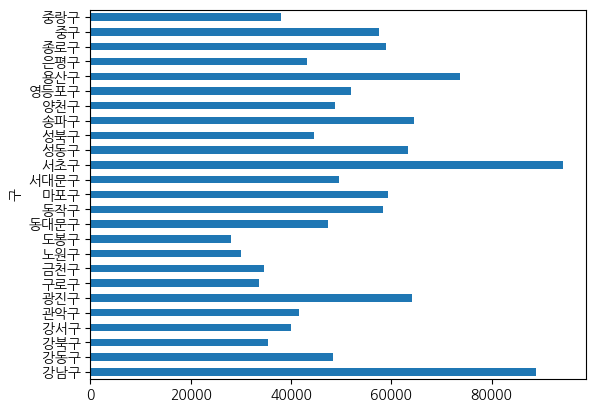

In [26]:
apt23_df.groupby('구')['보증금(만원)'].mean().plot(kind='barh')

<Axes: ylabel='구'>

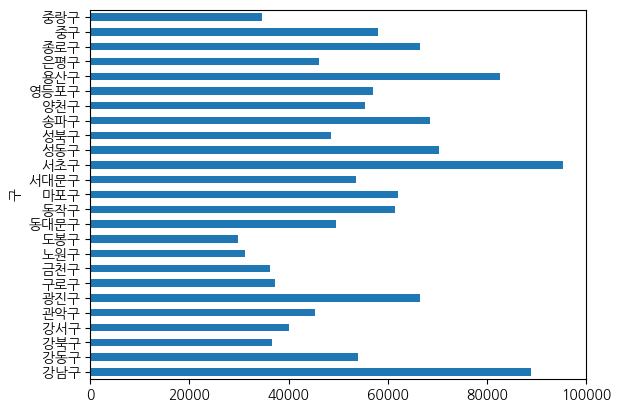

In [27]:
apt24_df.groupby('구')['보증금(만원)'].mean().plot(kind='barh')

In [225]:
apt23_df.to_csv('apt2023_전처리 완료.csv')

In [226]:
apt24_df.to_csv('apt2024_전처리 완료.csv')

## 건축년도별 보증금 변화 추이

<Axes: xlabel='건축년도'>

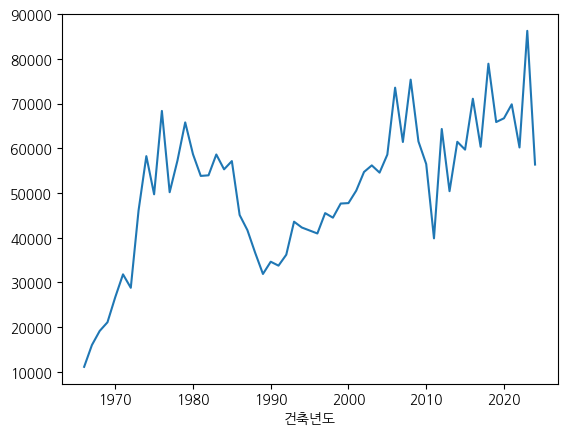

In [28]:
apt23_df.groupby('건축년도')['보증금(만원)'].mean().plot()

<Axes: xlabel='건축년도'>

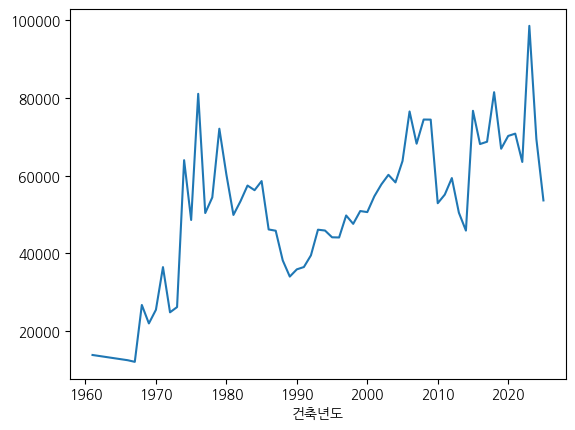

In [29]:
apt24_df.groupby('건축년도')['보증금(만원)'].mean().plot()

## 보증금 상관관계

#### 보증금과 거래건수 상관관계

In [30]:
deposit_count = apt23_df['보증금(만원)'].value_counts().reset_index(name='거래건수')
deposit_count

,보증금(만원),거래건수
0,50000,2371
1,40000,2196
2,45000,2045
3,60000,2021
4,55000,1773
...,...,...
2436,16396,1
2437,72700,1
2438,65200,1
2439,4684,1


In [31]:
deposit_count['보증금(만원)'].corr(deposit_count['거래건수'])

0.009186421624628356

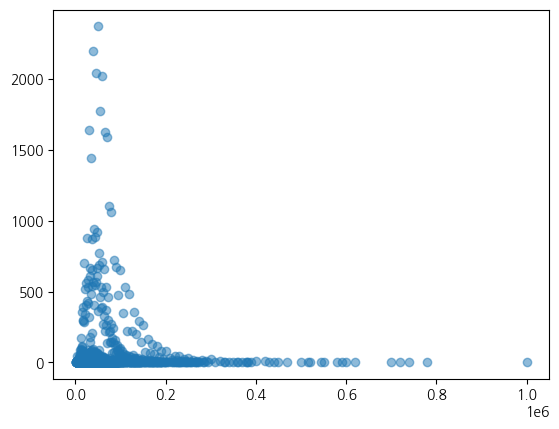

In [32]:
plt.scatter(deposit_count['보증금(만원)'],deposit_count['거래건수'], alpha=0.5)

#### 보증금과 건축년도 상관관계

In [33]:
apt23_df['보증금(만원)'].corr(apt23_df['건축년도'])

0.2783443577385024

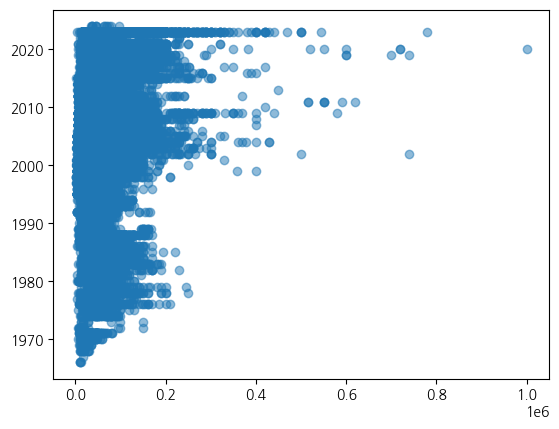

In [34]:
plt.scatter(apt23_df['보증금(만원)'],apt23_df['건축년도'], alpha=0.5)

#### 보증금과 전용면적간의 상관관계

In [35]:
apt23_df['보증금(만원)'].corr(apt23_df['전용면적(㎡)'])

0.6075195255244088

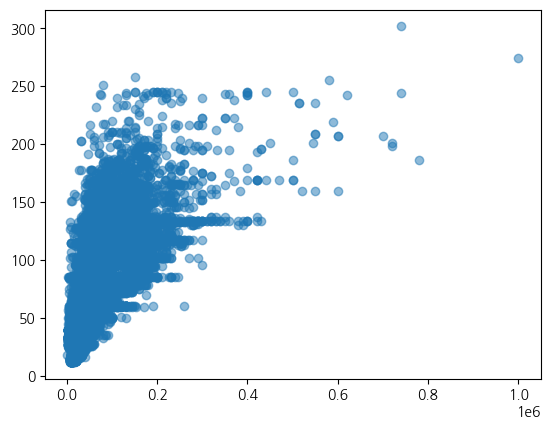

In [36]:
plt.scatter(apt23_df['보증금(만원)'],apt23_df['전용면적(㎡)'], alpha=0.5)

## 자치구별 거래건수 집계

In [37]:
apt23_df['구'].value_counts()

구
강남구     6490
노원구     5543
송파구     5137
서초구     4929
강동구     4074
강서구     4057
양천구     3612
은평구     3174
영등포구    2893
구로구     2737
마포구     2721
성동구     2693
동작구     2432
성북구     2399
동대문구    2202
서대문구    2020
중랑구     1966
도봉구     1771
관악구     1602
용산구     1542
광진구     1311
중구       931
금천구      821
강북구      760
종로구      577
Name: count, dtype: int64

In [38]:
apt24_df['구'].value_counts()

구
강남구     8317
송파구     7941
노원구     7672
강동구     7647
강서구     6871
서초구     6022
영등포구    4542
양천구     4512
마포구     4111
성동구     3807
성북구     3772
동작구     3676
구로구     3664
은평구     3594
동대문구    3301
중랑구     2802
서대문구    2775
도봉구     2569
관악구     2246
용산구     2156
광진구     1684
중구      1314
금천구     1296
강북구     1217
종로구      654
Name: count, dtype: int64

In [39]:
apt23_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68394 entries, 0 to 157625
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NO            68394 non-null  int64         
 1   시군구           68394 non-null  object        
 2   번지            68394 non-null  object        
 3   본번            68394 non-null  int64         
 4   부번            68394 non-null  int64         
 5   단지명           68394 non-null  object        
 6   전월세구분         68394 non-null  object        
 7   전용면적(㎡)       68394 non-null  float64       
 8   계약년월          68394 non-null  datetime64[ns]
 9   계약일           68394 non-null  int64         
 10  보증금(만원)       68394 non-null  int32         
 11  월세금(만원)       68394 non-null  int32         
 12  층             68394 non-null  int64         
 13  건축년도          68394 non-null  int64         
 14  도로명           68394 non-null  object        
 15  계약기간          68394 non-null  object    

In [40]:
# 구별 거래건수 집계
gu_counts_23 = apt23_df['구'].value_counts()
gu_counts_24 = apt24_df['구'].value_counts()

# 합치기 후 결측값 처리 및 정수형 변환
combined = gu_counts_23.add(gu_counts_24, fill_value=0).astype(int)

# 시리즈 → 데이터프레임 변환
combined_df = combined.reset_index()
combined_df.columns = ['구', '거래건수']

# 거래건수 기준 정렬
combined_df = combined_df.sort_values(by='거래건수', ascending=False)

# 결과 출력
combined_df

,구,거래건수
0,강남구,14807
8,노원구,13215
17,송파구,13078
1,강동구,11721
14,서초구,10951
3,강서구,10928
18,양천구,8124
19,영등포구,7435
12,마포구,6832
21,은평구,6768


## 지도 시각화

In [41]:
# ! pip install --upgrade openpyxl

In [42]:
seoul_map = pd.read_excel('D:/SDC_project/data_yena/서울시_행정동_좌표.xlsx')
seoul_map

,code,sido,gu,dong,lat,lng
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [43]:
seoul_map = seoul_map.rename(columns={'gu':'구','dong':'동','lat':'위도','lng':'경도'})
seoul_map

,code,sido,구,동,위도,경도
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [44]:
gu_coords_df = seoul_map[['구','위도','경도']]
combined_with_coords = pd.merge(combined_df, gu_coords_df, on=['구'], how='left')
combined_with_coords

,구,거래건수,위도,경도
0,강남구,14807,37.523807,127.026492
1,강남구,14807,37.511498,127.028552
2,강남구,14807,37.517353,127.037164
3,강남구,14807,37.530734,127.028461
4,강남구,14807,37.524399,127.050457
...,...,...,...,...
886,종로구,1231,37.610420,126.969837
887,종로구,1231,37.594148,126.964248
888,종로구,1231,37.600310,126.957773
889,종로구,1231,37.602696,126.961378


In [45]:
combined_with_coords.to_csv('combined_coords_apt.csv')

### 아파트 전세 거래 분포

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt

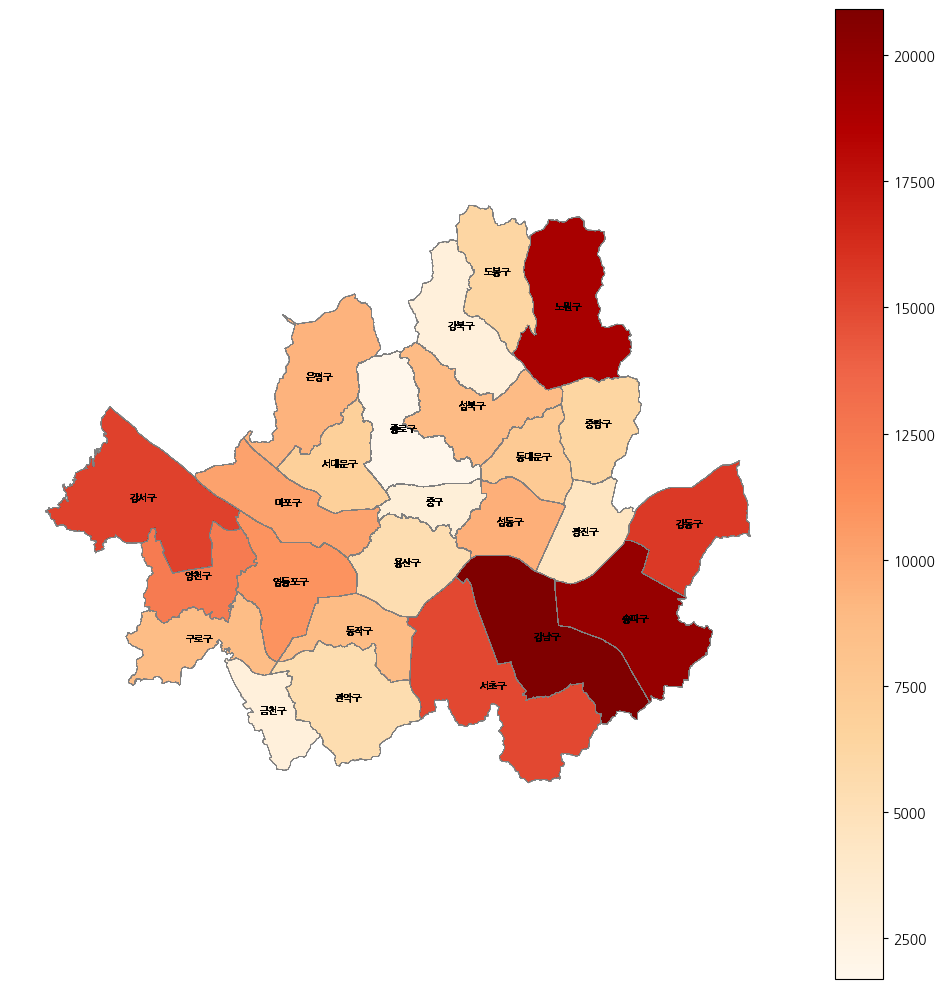

In [48]:
df = pd.read_csv('D:/SDC_project/data_yena/combined_coords_apt.csv')  

# 2. 서울 구 경계 지도 불러오기
# shp 또는 geojson 파일 필요 (서울시 행정구역 경계)
seoul_gu = gpd.read_file('D:/SDC_project/map_visualization/sig_20230729/sig.shp',encoding="cp949") 
seoul_gu = seoul_gu[seoul_gu['SIG_CD'].str.startswith('11')]

merged = seoul_gu.merge(df, left_on='SIG_KOR_NM', right_on='구')  

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.boundary.plot(ax=ax, color='gray', linewidth=0.3) 
merged.plot(column='거래건수', ax=ax, legend=True, cmap='OrRd', edgecolor='white', linewidth=0.3)

for idx, row in merged.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['구'],
             ha='center', fontsize=7, color='black')

plt.axis('off')
plt.tight_layout()
plt.savefig('seoul_deals_by_gu_clean.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
seoul_gu

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.25, 964875.565 19..."
5,11230,Dongdaemun-gu,동대문구,"POLYGON ((962141.919 1956519.461, 962149.853 1..."
6,11260,Jungnang-gu,중랑구,"POLYGON ((965698.531 1957987.355, 965772.29 19..."
7,11290,Seongbuk-gu,성북구,"POLYGON ((956787.318 1953542.506, 956761.258 1..."
8,11305,Gangbuk-gu,강북구,"POLYGON ((956316.789 1965175.345, 956401.551 1..."
9,11320,Dobong-gu,도봉구,"POLYGON ((957223.835 1961199.545, 957195.758 1..."


In [50]:
apt24_df['계약년월'].max()

Timestamp('2024-12-01 00:00:00')

## 이상 매물 탐지

#### 위험도 평가

In [51]:
apt23_df['동'].value_counts()

동
강동     4074
성동     2693
상계동    2482
신정동    1939
개포동    1660
       ... 
필동        1
산림동       1
필운동       1
동숭동       1
예장동       1
Name: count, Length: 232, dtype: int64

In [52]:
apt23_df[apt23_df['동'].isna()]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,구,동
347,348,서울특별시 용산구 원효로1가,28-7,28,7,시온캐슬용산,전세,21.6300,2023-12-01,30,...,2021,원효로81길 3,202401~202601,신규,-,0,NaN,아파트,용산구,NaN
1234,1235,서울특별시 용산구 원효로1가,28-7,28,7,시온캐슬용산,전세,21.6300,2023-12-01,29,...,2021,원효로81길 3,202401~202601,신규,-,0,NaN,아파트,용산구,NaN
1242,1243,서울특별시 용산구 원효로1가,41,41,0,용산더프라임,전세,84.9760,2023-12-01,29,...,2014,원효로90길 11,202403~202603,신규,-,0,NaN,아파트,용산구,NaN
1524,1525,서울특별시 서대문구 충정로3가,465,465,0,충정리시온,전세,41.4800,2023-12-01,29,...,2004,서소문로 27,202401~202601,신규,-,0,NaN,아파트,서대문구,NaN
2238,2239,서울특별시 용산구 한강로3가,89,89,0,쌍용스윗닷홈,전세,75.9700,2023-12-01,28,...,2003,한강대로10길 14,202403~202603,신규,-,0,NaN,아파트,용산구,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156168,156169,서울특별시 중구 충무로5가,36-2,36,2,충무로엘크루메크로시티2차,전세,22.7500,2023-06-01,2,...,2016,퇴계로49길 14,202307~202507,신규,-,0,NaN,아파트,중구,NaN
156179,156180,서울특별시 중구 충무로5가,36-2,36,2,충무로엘크루메크로시티2차,전세,22.7500,2023-06-01,2,...,2016,퇴계로49길 14,-,신규,-,0,NaN,아파트,중구,NaN
156180,156181,서울특별시 중구 충무로5가,36-2,36,2,충무로엘크루메크로시티2차,전세,22.7500,2023-06-01,2,...,2016,퇴계로49길 14,-,신규,-,0,NaN,아파트,중구,NaN
157247,157248,서울특별시 용산구 한강로3가,89,89,0,쌍용스윗닷홈,전세,62.0800,2023-06-01,1,...,2003,한강대로10길 14,202308~202508,신규,-,0,NaN,아파트,용산구,NaN


In [53]:
apt23_deal = pd.read_csv('data_yena/아파트(매매)_실거래가_2023.csv', header=15, encoding='cp949')
apt24_deal = pd.read_csv('data_yena/아파트(매매)_실거래가_2024.csv', header=15, encoding='cp949')

In [64]:
apt23_deal['구'] = apt23_deal['시군구'].str.extract(r'(\S+구)')
apt24_deal['구'] = apt24_deal['시군구'].str.extract(r'(\S+구)')

In [65]:
apt23_deal['동'] = apt23_deal['시군구'].str.extract(r'(\S+동)')
apt24_deal['동'] = apt24_deal['시군구'].str.extract(r'(\S+동)')

In [67]:
apt23_deal.isnull().sum()

NO            0
시군구           0
번지            0
본번            0
부번            0
단지명           0
전용면적(㎡)       0
계약년월          0
계약일           0
거래금액(만원)      0
동           134
층             0
매수자           0
매도자           0
건축년도          0
도로명           0
해제사유발생일       0
거래유형          0
중개사소재지        0
등기일자          0
구             0
dtype: int64

In [68]:
apt24_deal.isnull().sum()

NO            0
시군구           0
번지            0
본번            0
부번            0
단지명           0
전용면적(㎡)       0
계약년월          0
계약일           0
거래금액(만원)      0
동           240
층             0
매수자           0
매도자           0
건축년도          0
도로명           0
해제사유발생일       0
거래유형          0
중개사소재지        0
등기일자          0
구             0
dtype: int64

In [71]:
apt23_deal[apt23_deal['동'].isna()][['시군구','동']]

,시군구,동
297,서울특별시 용산구 한강로2가,NaN
562,서울특별시 용산구 한강로1가,NaN
587,서울특별시 용산구 한강로2가,NaN
1291,서울특별시 중구 충무로5가,NaN
1303,서울특별시 종로구 신문로2가,NaN
...,...,...
34663,서울특별시 용산구 원효로4가,NaN
34798,서울특별시 중구 충무로5가,NaN
34821,서울특별시 용산구 한강로3가,NaN
35059,서울특별시 용산구 원효로1가,NaN


In [74]:
apt23_deal[apt23_deal['동'].isna()]['시군구'].value_counts()

시군구
서울특별시 용산구 한강로3가     30
서울특별시 서대문구 충정로3가    14
서울특별시 중구 충무로5가      13
서울특별시 중구 충무로4가      13
서울특별시 용산구 한강로2가     12
서울특별시 용산구 원효로1가     12
서울특별시 용산구 원효로4가     10
서울특별시 용산구 한강로1가      8
서울특별시 종로구 명륜2가       6
서울특별시 중구 을지로5가       3
서울특별시 종로구 신문로2가      3
서울특별시 중구 남대문로5가      2
서울특별시 종로구 신문로1가      2
서울특별시 서대문구 충정로2가     2
서울특별시 종로구 명륜1가       2
서울특별시 용산구 원효로2가      1
서울특별시 용산구 원효로3가      1
Name: count, dtype: int64

In [ ]:
apt23_deal['구'].value_counts()

구
송파구     2757
노원구     2653
강남구     2339
강동구     2195
성북구     1942
강서구     1814
영등포구    1808
은평구     1646
양천구     1616
서초구     1584
성동구     1565
동대문구    1532
마포구     1495
구로구     1481
서대문구    1308
동작구     1250
도봉구     1133
관악구     1036
중랑구      958
강북구      855
광진구      700
용산구      566
금천구      556
중구       553
종로구      316
Name: count, dtype: int64

In [62]:
apt24_deal

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,구
0,1,서울특별시 성동구 금호동1가,633,633,0,벽산,84.820,202412,31,"138,500",...,18,개인,개인,2001,금호로 100,-,중개거래,서울 성동구,25.03.20,성동구
1,2,서울특별시 동대문구 용두동,796,796,0,래미안엘리니티,84.990,202412,31,"145,500",...,8,개인,개인,2022,한빛로 49,-,중개거래,서울 동대문구,25.03.12,동대문구
2,3,서울특별시 동대문구 용두동,792,792,0,래미안 허브리츠,59.980,202412,31,"105,800",...,10,개인,개인,2011,정릉천동로 36,-,중개거래,서울 동대문구,25.03.17,동대문구
3,4,서울특별시 중구 신당동,842,842,0,약수하이츠,84.880,202412,31,"131,000",...,10,개인,개인,1999,동호로10길 30,-,중개거래,서울 중구,25.02.27,중구
4,5,서울특별시 광진구 광장동,566,566,0,청구,84.860,202412,31,"132,000",...,20,개인,개인,1996,아차산로 503-23,-,중개거래,서울 광진구,25.02.28,광진구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57400,57401,서울특별시 도봉구 쌍문동,731,731,0,e편한세상,84.978,202401,1,"61,000",...,1,개인,개인,2007,노해로41가길 16,-,중개거래,서울 도봉구,24.02.26,도봉구
57401,57402,서울특별시 은평구 진관동,102,102,0,박석고개1단지힐스테이트(116~131동)BL2-1,84.720,202401,1,"97,000",...,13,개인,개인,2009,진관1로 21-10,-,중개거래,서울 은평구,24.02.19,은평구
57402,57403,서울특별시 송파구 가락동,165,165,0,래미안파크팰리스,84.885,202401,1,"149,000",...,5,개인,개인,2007,동남로 225,-,중개거래,서울 송파구,24.02.20,송파구
57403,57404,서울특별시 송파구 가락동,53,53,0,"가락3차쌍용스윗닷홈101동,102동",59.940,202401,1,"100,000",...,11,개인,개인,2005,송이로21길 23,-,중개거래,서울 송파구,24.03.26,송파구


In [79]:
apt23_deal['거래금액(만원)'] = apt23_deal['거래금액(만원)'].str.replace(',', '').astype(int)
apt24_deal['거래금액(만원)'] = apt24_deal['거래금액(만원)'].str.replace(',', '').astype(int)

In [ ]:
apt23_deal['계약년월'] = pd.to_datetime(apt23_deal['계약년월'].astype(str), format='%Y%m')
apt24_deal['계약년월'] = pd.to_datetime(apt24_deal['계약년월'].astype(str), format='%Y%m')

In [83]:
apt23_deal = apt23_deal[apt23_deal['계약년월']>='2023-06-01']
apt23_deal

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,구
0,1,서울특별시 성북구 하월곡동,225,225,0,래미안월곡,59.7540,2023-12-01,31,68500,...,2,-,-,2006,오패산로 90,-,중개거래,서울 성북구,24.03.15,성북구
1,2,서울특별시 중랑구 신내동,650,650,0,신내6대주,49.7700,2023-12-01,31,49000,...,6,-,-,1996,신내로19길 42,-,중개거래,서울 중랑구,24.02.26,중랑구
2,3,서울특별시 서대문구 홍은동,454,454,0,극동,84.9200,2023-12-01,31,50000,...,13,-,-,1995,포방터10길 33,-,중개거래,서울 서대문구,24.02.08,서대문구
3,4,서울특별시 노원구 공릉동,760,760,0,화랑대디오베이션,59.9883,2023-12-01,31,59900,...,7,-,-,2021,노원로1길 95,-,중개거래,서울 노원구,24.04.05,노원구
4,5,서울특별시 서초구 잠원동,71-1,71,1,블루힐하우스,84.5400,2023-12-01,31,182000,...,2,-,-,1999,잠원로 85,-,중개거래,서울 서초구,24.03.15,서초구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,21576,서울특별시 노원구 공릉동,109,109,0,비선아파트,48.6000,2023-06-01,1,42000,...,9,-,-,1999,화랑로51길 78,-,직거래,-,23.06.02,노원구
21576,21577,서울특별시 동대문구 장안동,334-6,334,6,우성2차아파트(334-6),84.6700,2023-06-01,1,63000,...,8,-,-,2005,장한로26길 67,-,중개거래,서울 동대문구,23.09.19,동대문구
21577,21578,서울특별시 동대문구 전농동,690,690,0,래미안크레시티,121.9500,2023-06-01,1,142000,...,6,-,-,2014,사가정로 65,-,중개거래,서울 동대문구,23.07.28,동대문구
21578,21579,서울특별시 동대문구 답십리동,1013,1013,0,래미안미드카운티,84.9900,2023-06-01,1,116000,...,15,-,-,2019,답십리로 141,-,중개거래,서울 동대문구,23.07.31,동대문구


### 구별 전세가율

In [133]:
apt23_deal.nunique()

NO          21580
시군구           306
번지           2658
본번           1336
부번            160
단지명          3345
전용면적(㎡)      4288
계약년월            7
계약일            31
거래금액(만원)     2020
동             227
층              59
매수자             1
매도자             1
건축년도           58
도로명          3887
해제사유발생일       247
거래유형            2
중개사소재지        675
등기일자          314
구              25
dtype: int64

In [85]:
apt23_deal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21580 entries, 0 to 21579
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NO        21580 non-null  int64         
 1   시군구       21580 non-null  object        
 2   번지        21580 non-null  object        
 3   본번        21580 non-null  int64         
 4   부번        21580 non-null  int64         
 5   단지명       21580 non-null  object        
 6   전용면적(㎡)   21580 non-null  float64       
 7   계약년월      21580 non-null  datetime64[ns]
 8   계약일       21580 non-null  int64         
 9   거래금액(만원)  21580 non-null  int32         
 10  동         21487 non-null  object        
 11  층         21580 non-null  int64         
 12  매수자       21580 non-null  object        
 13  매도자       21580 non-null  object        
 14  건축년도      21580 non-null  int64         
 15  도로명       21580 non-null  object        
 16  해제사유발생일   21580 non-null  object        
 17  거래유형      21580 n

In [95]:
apt_gu_jeonse = pd.concat([apt23_df[['구','보증금(만원)']], apt24_df[['구','보증금(만원)']]])
apt_gu_jeonse

,구,보증금(만원)
0,중구,60000
4,용산구,40000
5,용산구,67000
6,용산구,67000
9,성동구,66150
...,...,...
249738,서초구,160000
249743,중랑구,45000
249748,양천구,28000
249757,송파구,69000


In [96]:
apt_gu_jeonse = apt_gu_jeonse.groupby('구')['보증금(만원)'].mean().reset_index(name='평균 보증금')
apt_gu_jeonse

,구,평균 보증금
0,강남구,88896.949889
1,강동구,52128.376418
2,강북구,36202.196763
3,강서구,40038.292002
4,관악구,43789.279626
5,광진구,65532.352254
6,구로구,35677.973285
7,금천구,35615.865376
8,노원구,30694.353689
9,도봉구,29054.112442


In [90]:
apt_gu_deal = pd.concat([apt23_deal[['구','거래금액(만원)']], apt24_deal[['구','거래금액(만원)']]])
apt_gu_deal

,구,거래금액(만원)
0,성북구,68500
1,중랑구,49000
2,서대문구,50000
3,노원구,59900
4,서초구,182000
...,...,...
57400,도봉구,61000
57401,은평구,97000
57402,송파구,149000
57403,송파구,100000


In [91]:
# 전세 보증금을 매매 가격으로 나눈 후, 이를 100으로 곱해 퍼센트
apt_gu_deal = apt_gu_deal.groupby('구')['거래금액(만원)'].mean().reset_index(name='평균 매매가')
apt_gu_deal

,구,평균 매매가
0,강남구,243420.147848
1,강동구,103019.817237
2,강북구,55298.174519
3,강서구,79226.225266
4,관악구,73381.384983
5,광진구,119859.660460
6,구로구,66792.505177
7,금천구,60583.853153
8,노원구,60762.392620
9,도봉구,53638.848806


<Axes: >

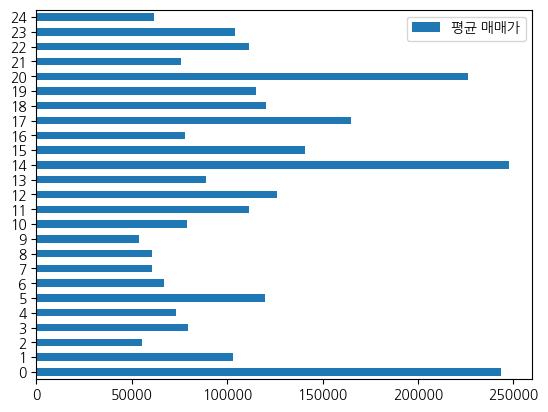

In [92]:
apt_gu_deal.plot(kind='barh')

In [97]:
apt_gu_deal = pd.merge(apt_gu_deal,apt_gu_jeonse, on='구', how='inner')
apt_gu_deal

,구,평균 매매가,평균 보증금
0,강남구,243420.147848,88896.949889
1,강동구,103019.817237,52128.376418
2,강북구,55298.174519,36202.196763
3,강서구,79226.225266,40038.292002
4,관악구,73381.384983,43789.279626
5,광진구,119859.660460,65532.352254
6,구로구,66792.505177,35677.973285
7,금천구,60583.853153,35615.865376
8,노원구,60762.392620,30694.353689
9,도봉구,53638.848806,29054.112442


In [98]:
apt_gu_deal['전세가율'] = apt_gu_deal['평균 보증금'] / apt_gu_deal['평균 매매가'] * 100
apt_gu_deal

,구,평균 매매가,평균 보증금,전세가율
0,강남구,243420.147848,88896.949889,36.519964
1,강동구,103019.817237,52128.376418,50.600339
2,강북구,55298.174519,36202.196763,65.467255
3,강서구,79226.225266,40038.292002,50.536665
4,관악구,73381.384983,43789.279626,59.673553
5,광진구,119859.660460,65532.352254,54.674235
6,구로구,66792.505177,35677.973285,53.416133
7,금천구,60583.853153,35615.865376,58.787719
8,노원구,60762.392620,30694.353689,50.515380
9,도봉구,53638.848806,29054.112442,54.166174


<Axes: >

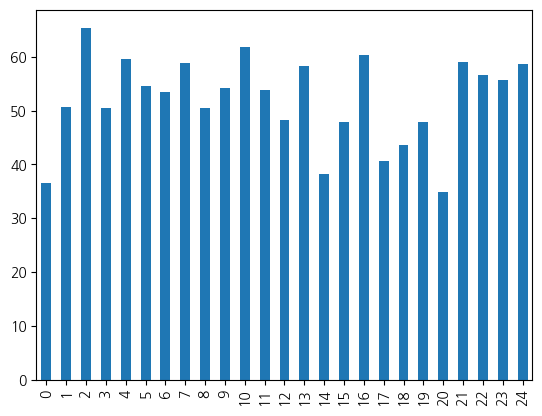

In [99]:
apt_gu_deal['전세가율'].plot(kind='bar')

In [ ]:
# # 1. 기준 시점 평균 보증금 (예: 2020년 1월)
# baseline_price = apt_df[apt_df['계약년월'] == '2020-01'].groupby('구')['보증금(만원)'].mean()

# # 2. 구별로 전세가격지수 비율 계산
# apt_df = apt_df.merge(baseline_price.rename('기준보증금'), on='구', how='left')
# apt_df['예상보증금'] = apt_df['기준보증금'] * (apt_df['전세가격지수'] / 100)

# # 3. 위험비율 계산
# apt_df['위험비율'] = apt_df['보증금(만원)'] / apt_df['예상보증금'] * 100
# apt_df['위험비율'] 

In [ ]:
# apt23_df['위험비율'] = apt23_df['보증금(만원)'] / apt23_df.groupby('구')['보증금(만원)'].transform('mean') * 100
# apt23_df

C:\Users\emily\AppData\Local\Temp\ipykernel_4008\4178383296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['위험비율'] = apt23_df['보증금(만원)'] / apt23_df.groupby('구')['보증금(만원)'].transform('mean') * 100


,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,구,동,위험비율
0,1,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,2023-12-01,31,...,동호로10길 30,202402~202602,신규,-,0,NaN,아파트,중구,신당동,104.347349
4,5,서울특별시 용산구 이촌동,395,395,0,대림,전세,59.22,2023-12-01,31,...,이촌로2가길 122,202403~202603,신규,-,0,NaN,아파트,용산구,이촌동,54.315886
5,6,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,백범로 260,-,신규,-,0,NaN,아파트,용산구,효창동,90.979109
6,7,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,백범로 260,202402~202602,신규,-,0,NaN,아파트,용산구,효창동,90.979109
9,10,서울특별시 성동구 금호동2가,1,1,0,신금호파크자이,전세,59.98,2023-12-01,31,...,금호로 173,-,신규,-,0,NaN,아파트,성동구,성동,104.375610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157613,157614,서울특별시 서초구 방배동,2525,2525,0,방배우성,전세,117.19,2023-06-01,1,...,방배선행길 1,202309~202509,신규,-,0,NaN,아파트,서초구,방배동,74.332995
157616,157617,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,125.40,2023-06-01,1,...,사당로17길 52,202308~202508,신규,-,0,NaN,아파트,동작구,사당동,102.775635
157620,157621,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,천호대로 1077,202308~202508,신규,-,0,NaN,아파트,강동구,강동,129.940116
157621,157622,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,천호대로 1077,202308~202509,신규,-,0,NaN,아파트,강동구,강동,129.940116


In [ ]:
# apt23_df['위험비율'].describe()

count    68394.000000
mean       100.000000
std         48.560996
min          2.512079
25%         68.280534
50%         94.671755
75%        125.148973
max       1136.061066
Name: 위험비율, dtype: float64

### 위험 스코어

In [151]:
# 1) 필요한 컬럼 정리
df23 = apt23_df[['구', '전용면적(㎡)', '보증금(만원)', '계약년월', '계약일', '건축년도', '계약구분', '도로명', '종전계약 보증금(만원)']]
df24 = apt24_df[['구', '전용면적(㎡)', '보증금(만원)', '계약년월', '계약일', '건축년도', '계약구분', '도로명', '종전계약 보증금(만원)']]

In [199]:
total_df = pd.concat([df23,df24])
total_df

,구,전용면적(㎡),보증금(만원),계약년월,계약일,건축년도,계약구분,도로명,종전계약 보증금(만원)
0,중구,84.880,60000,2023-12-01,31,1999,신규,동호로10길 30,0
4,용산구,59.220,40000,2023-12-01,31,1994,신규,이촌로2가길 122,0
5,용산구,59.410,67000,2023-12-01,31,2010,신규,백범로 260,0
6,용산구,59.410,67000,2023-12-01,31,2010,신규,백범로 260,0
9,성동구,59.980,66150,2023-12-01,31,2016,신규,금호로 173,0
...,...,...,...,...,...,...,...,...,...
249738,서초구,133.910,160000,2024-01-01,1,2023,신규,반포대로 333,0
249743,중랑구,84.741,45000,2024-01-01,1,2004,신규,겸재로29길 27,0
249748,양천구,59.690,28000,2024-01-01,1,1999,신규,목동남로4길 20,0
249757,송파구,84.980,69000,2024-01-01,1,2008,신규,충민로6길 14,0


In [224]:
total_df.to_csv('apt23,24합본.csv')

In [153]:
total_df['도로명'].value_counts()

도로명
개포로 310         1355
송파대로 345         880
양재대로 1300        781
반포대로 333         764
고덕로 333          745
                ... 
한남대로36길 54         1
남부순환로82길 2         1
동일로180길 48-9       1
강서로7길 108          1
송파대로30길 11         1
Name: count, Length: 6762, dtype: int64

In [154]:
total_df['도로명'].value_counts().reset_index(name='거래건수')

,도로명,거래건수
0,개포로 310,1355
1,송파대로 345,880
2,양재대로 1300,781
3,반포대로 333,764
4,고덕로 333,745
...,...,...
6757,한남대로36길 54,1
6758,남부순환로82길 2,1
6759,동일로180길 48-9,1
6760,강서로7길 108,1


In [155]:
total_df['단가'] = total_df['보증금(만원)'] / total_df['전용면적(㎡)']

# 자치구별 IQR 기반 이상치 탐지
def detect_iqr_outliers(group):
    q1 = group['단가'].quantile(0.25)
    q3 = group['단가'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    group['이상거래'] = ~group['단가'].between(lower, upper)
    return group

In [159]:
total_df2 = total_df[['구','단가']].groupby('구').apply(detect_iqr_outliers)
total_df2

C:\Users\emily\AppData\Local\Temp\ipykernel_21120\813076938.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_df2 = total_df[['구','단가']].groupby('구').apply(detect_iqr_outliers)


구           단가   이상거래
구                                  
강남구 126     강남구  1530.492112  False
    129     강남구  1412.595644  False
    137     강남구  1176.643624  False
    138     강남구   556.623823  False
    139     강남구   740.592474  False
...         ...          ...    ...
중랑구 249609  중랑구   667.113633  False
    249613  중랑구   605.519158  False
    249615  중랑구   610.288015  False
    249616  중랑구   468.262227  False
    249743  중랑구   531.029844  False

[166556 rows x 3 columns]

In [145]:
total_df['이상거래'].value_counts()

이상거래
False    163718
True       2838
Name: count, dtype: int64

In [165]:
total_df2 = total_df2.drop(columns=['구'])

In [166]:
total_df2

단가   이상거래
구                             
강남구 126     1530.492112  False
    129     1412.595644  False
    137     1176.643624  False
    138      556.623823  False
    139      740.592474  False
...                 ...    ...
중랑구 249609   667.113633  False
    249613   605.519158  False
    249615   610.288015  False
    249616   468.262227  False
    249743   531.029844  False

[166556 rows x 2 columns]

In [172]:
total_df2 = total_df2.groupby('구')['이상거래'].value_counts().reset_index()
total_df2

,구,이상거래,count
0,강남구,False,14757
1,강남구,True,50
2,강동구,False,11679
3,강동구,True,42
4,강북구,False,1873
5,강북구,True,104
6,강서구,False,10753
7,강서구,True,175
8,관악구,False,3665
9,관악구,True,183


In [176]:
total_df2[total_df2['이상거래']==True].sort_values(by='count',ascending=False)

,구,이상거래,count
17,노원구,True,663
48,중랑구,True,351
9,관악구,True,183
7,강서구,True,175
23,동작구,True,149
31,성동구,True,142
33,성북구,True,136
19,도봉구,True,117
41,용산구,True,108
5,강북구,True,104


In [200]:
# 2) 계약연월 컬럼 만들기
total_df['계약연월'] = total_df['계약년월'].astype(str)

# 3) 건축년도 구간화
total_df['건축연도대'] = pd.cut(total_df['건축년도'], bins=[1900, 1989, 1999, 2009, 2019, 2031],
                        labels=['~1989', '1990s', '2000s', '2010s', '2020s'])

# 4) 면적 구간화
total_df['면적대'] = pd.cut(total_df['전용면적(㎡)'], bins=[0, 30, 50, 70, 100, 999],
                     labels=['~30', '30-50', '50-70', '70-100', '100+'])

In [201]:
# 유사 조건 그룹 생성
total_df['조건그룹'] = total_df[['구', '건축연도대', '면적대']].astype(str).agg('_'.join, axis=1)

# 그룹별 평균/표준편차
group_stats = total_df.groupby('조건그룹')['보증금(만원)'].agg(['mean', 'std']).reset_index()
group_stats.columns = ['조건그룹', '보증금_평균', '보증금_표준편차']

# 병합 후 z-score 계산
total_df = total_df.merge(group_stats, on='조건그룹', how='left')
total_df['보증금_zscore'] = (total_df['보증금(만원)'] - total_df['보증금_평균']) / total_df['보증금_표준편차']
total_df['보증금_이상치'] = total_df['보증금_zscore'].abs() > 2  # Z-score 2 초과이면 이상치

In [202]:
total_df['도로명_연월'] = total_df['도로명'] + '_' + total_df['계약연월']
주소_빈도 = total_df['도로명_연월'].value_counts().reset_index()
주소_빈도.columns = ['도로명_연월', '주소_해당월_거래수']

# 병합
total_df = total_df.merge(주소_빈도, on='도로명_연월', how='left')
total_df['거래_집중의심'] = total_df['주소_해당월_거래수'] >= 3

In [203]:
total_df['노후건물'] = total_df['건축년도'] < 1990
total_df['노후_이상보증'] = total_df['노후건물'] & total_df['보증금_이상치']

In [207]:
total_df['단가'] = total_df['보증금(만원)'] / total_df['전용면적(㎡)']

In [ ]:
# 2. 자치구별 집계
구별_지표 = total_df.groupby('구').agg({
    '보증금_이상치': 'sum',
    '거래_집중의심': 'sum',
    '노후_이상보증': 'sum',
    '도로명': 'count',     # 총 거래 수
    '단가': 'mean'         # 구별 평균 단가
}).reset_index()

# 3. 비율 계산
구별_지표['보증금_이상비율'] = 구별_지표['보증금_이상치'] / 구별_지표['도로명']
구별_지표['거래집중비율'] = 구별_지표['거래_집중의심'] / 구별_지표['도로명']
구별_지표['노후이상비율'] = 구별_지표['노후_이상보증'] / 구별_지표['도로명']

In [214]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
score_cols = ['단가', '보증금_이상비율', '거래집중비율', '노후이상비율']
구별_지표[[f'{col}_정규화' for col in score_cols]] = scaler.fit_transform(구별_지표[score_cols])

# 종합 점수 = 평균
구별_지표['위험스코어'] = 구별_지표[[f'{col}_정규화' for col in score_cols]].mean(axis=1)

# 위험 상위 구 보기
상위구 = 구별_지표.sort_values('위험스코어', ascending=False).head(5)

In [218]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
score_cols = ['단가', '보증금_이상비율', '거래집중비율', '노후이상비율']
구별_지표[[f'{col}_정규화' for col in score_cols]] = scaler.fit_transform(구별_지표[score_cols])

# 종합 점수 = 평균
구별_지표['위험스코어'] = 구별_지표[[f'{col}_정규화' for col in score_cols]].mean(axis=1)

# 위험 상위 구 보기
상위구 = 구별_지표.sort_values('위험스코어', ascending=False).head(5)

In [193]:
구별_지표['위험스코어'] 

0     0.539478
1     0.501137
2     0.442075
3     0.410366
4     0.321176
5     0.340660
6     0.408503
7     0.366106
8     0.685539
9     0.472225
10    0.357609
11    0.620997
12    0.470907
13    0.527226
14    0.471187
15    0.504130
16    0.403462
17    0.407542
18    0.392562
19    0.535564
20    0.271997
21    0.300000
22    0.210357
23    0.341870
24    0.586514
Name: 위험스코어, dtype: float64

In [219]:
상위구

,구,보증금_이상치,거래_집중의심,노후_이상보증,도로명,단가,보증금_이상비율,거래집중비율,노후이상비율,단가_정규화,보증금_이상비율_정규화,거래집중비율_정규화,노후이상비율_정규화,위험스코어
8,노원구,591,11315,317,13215,486.220942,0.044722,0.856224,0.023988,-0.943034,0.203657,1.377175,2.929084,0.891721
0,강남구,630,11768,159,14807,1094.855644,0.042547,0.794759,0.010738,1.574273,-0.069432,0.586582,1.040520,0.782986
15,성동구,282,5378,22,6500,883.949640,0.043385,0.827385,0.003385,0.701968,0.035708,1.006228,-0.007625,0.434069
11,동작구,299,4862,21,6108,790.651861,0.048952,0.796005,0.003438,0.316089,0.734933,0.602609,0.000000,0.413408
19,영등포구,344,5331,95,7435,754.009191,0.046268,0.717014,0.012777,0.164536,0.397785,-0.413418,1.331185,0.370022


In [116]:
total_df.describe()

,전용면적(㎡),보증금(만원),계약년월,계약일,건축년도,보증금_평균,보증금_표준편차,보증금_zscore,주소_해당월_거래수
count,166556.000000,166556.000000,166556,166556.000000,166556.000000,166556.000000,166545.000000,1.665330e+05,166556.000000
mean,74.193126,56375.643952,2024-02-15 00:51:04.742189056,15.810202,2003.763269,56375.643952,15216.405030,4.522679e-18,16.448654
min,11.480000,955.000000,2023-06-01 00:00:00,1.000000,1961.000000,2595.333333,0.000000,-7.405596e+00,1.000000
25%,59.680000,34000.000000,2023-10-01 00:00:00,9.000000,1994.000000,37576.500000,7249.132399,-6.629949e-01,3.000000
50%,73.920000,50000.000000,2024-02-01 00:00:00,16.000000,2004.000000,50666.832437,11318.257223,-1.941679e-02,6.000000
75%,84.950000,69000.000000,2024-07-01 00:00:00,23.000000,2014.000000,66871.174377,16745.891856,6.571399e-01,12.000000
max,301.470000,1000000.000000,2024-12-01 00:00:00,31.000000,2025.000000,558897.058824,171140.843242,1.075170e+01,418.000000
std,26.194895,37074.971710,NaN,8.565387,12.381583,30750.241357,14096.497031,9.983413e-01,40.549497


In [119]:
total_df[total_df['주소_해당월_거래수']==1].nunique()

구                  25
전용면적(㎡)          6016
보증금(만원)          1326
계약년월               19
계약일                31
건축년도               61
계약구분                1
도로명              6192
종전계약 보증금(만원)        1
계약연월               19
건축연도대               5
면적대                 5
조건그룹              539
보증금_평균            538
보증금_표준편차          530
보증금_zscore       9938
보증금_이상치             2
도로명_연월          19664
주소_해당월_거래수          1
거래_집중의심             1
노후건물                2
노후_이상보증             2
dtype: int64

In [121]:
total_df['주소_해당월_거래수'].value_counts()

주소_해당월_거래수
1     19664
2     18516
3     15693
4     13384
5     11655
      ...  
64       64
63       63
60       60
58       58
48       48
Name: count, Length: 118, dtype: int64

In [122]:
total_df[total_df['주소_해당월_거래수']==1].nunique()

구                  25
전용면적(㎡)          6016
보증금(만원)          1326
계약년월               19
계약일                31
건축년도               61
계약구분                1
도로명              6192
종전계약 보증금(만원)        1
계약연월               19
건축연도대               5
면적대                 5
조건그룹              539
보증금_평균            538
보증금_표준편차          530
보증금_zscore       9938
보증금_이상치             2
도로명_연월          19664
주소_해당월_거래수          1
거래_집중의심             1
노후건물                2
노후_이상보증             2
dtype: int64

<Axes: >

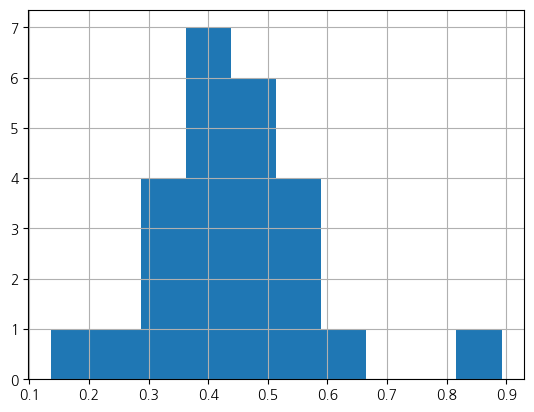

In [130]:
구별_지표['위험스코어'].hist()

In [195]:
구별_지표.sort_values(by='위험스코어' , ascending=False)

,구,보증금_이상치,거래_집중의심,노후_이상보증,신규_이상보증,도로명,보증금_이상비율,거래집중비율,노후이상비율,신규이상비율,보증금_이상비율_정규화,거래집중비율_정규화,노후이상비율_정규화,신규이상비율_정규화,위험스코어
8,노원구,591,11315,317,23,13215,0.044722,0.856224,0.023988,0.001740,0.675770,1.000000,1.000000,0.066388,0.685539
11,동작구,299,4862,21,121,6108,0.048952,0.796005,0.003438,0.019810,0.849762,0.735264,0.143327,0.755636,0.620997
24,중랑구,229,3511,7,125,4768,0.048029,0.736367,0.001468,0.026216,0.811771,0.473081,0.061203,1.000000,0.586514
0,강남구,630,11768,159,153,14807,0.042547,0.794759,0.010738,0.010333,0.586335,0.729786,0.447649,0.394140,0.539478
19,영등포구,344,5331,95,94,7435,0.046268,0.717014,0.012777,0.012643,0.739347,0.387999,0.532661,0.482251,0.535564
13,서대문구,225,3680,12,79,4795,0.046924,0.767466,0.002503,0.016475,0.766337,0.609799,0.104328,0.628441,0.527226
15,성동구,282,5378,22,65,6500,0.043385,0.827385,0.003385,0.010000,0.620768,0.873215,0.141097,0.381440,0.504130
1,강동구,471,9595,45,160,11721,0.040184,0.818616,0.003839,0.013651,0.489138,0.834667,0.160050,0.520693,0.501137
9,도봉구,212,3152,64,0,4340,0.048848,0.726267,0.014747,0.000000,0.845473,0.428679,0.614749,0.000000,0.472225
14,서초구,431,8204,59,194,10951,0.039357,0.749155,0.005388,0.017715,0.455117,0.529300,0.224598,0.675732,0.471187


In [123]:
total_df

,구,전용면적(㎡),보증금(만원),계약년월,계약일,건축년도,계약구분,도로명,종전계약 보증금(만원),계약연월,...,조건그룹,보증금_평균,보증금_표준편차,보증금_zscore,보증금_이상치,도로명_연월,주소_해당월_거래수,거래_집중의심,노후건물,노후_이상보증
0,중구,84.880,60000,2023-12-01,31,1999,신규,동호로10길 30,0,2023-12-01,...,중구_1990s_70-100,59554.137931,9253.847338,0.048181,False,동호로10길 30_2023-12-01,8,True,False,False
1,용산구,59.220,40000,2023-12-01,31,1994,신규,이촌로2가길 122,0,2023-12-01,...,용산구_1990s_50-70,54604.302222,9084.650463,-1.607580,False,이촌로2가길 122_2023-12-01,8,True,False,False
2,용산구,59.410,67000,2023-12-01,31,2010,신규,백범로 260,0,2023-12-01,...,용산구_2010s_50-70,77818.891156,30264.590079,-0.357477,False,백범로 260_2023-12-01,3,True,False,False
3,용산구,59.410,67000,2023-12-01,31,2010,신규,백범로 260,0,2023-12-01,...,용산구_2010s_50-70,77818.891156,30264.590079,-0.357477,False,백범로 260_2023-12-01,3,True,False,False
4,성동구,59.980,66150,2023-12-01,31,2016,신규,금호로 173,0,2023-12-01,...,성동구_2010s_50-70,71415.131113,14252.670923,-0.369414,False,금호로 173_2023-12-01,8,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166551,서초구,133.910,160000,2024-01-01,1,2023,신규,반포대로 333,0,2024-01-01,...,서초구_2020s_100+,243820.707071,89933.023886,-0.932035,False,반포대로 333_2024-01-01,20,True,False,False
166552,중랑구,84.741,45000,2024-01-01,1,2004,신규,겸재로29길 27,0,2024-01-01,...,중랑구_2000s_70-100,43581.122596,7211.707249,0.196746,False,겸재로29길 27_2024-01-01,3,True,False,False
166553,양천구,59.690,28000,2024-01-01,1,1999,신규,목동남로4길 20,0,2024-01-01,...,양천구_1990s_50-70,44401.720000,15706.834360,-1.044241,False,목동남로4길 20_2024-01-01,1,False,False,False
166554,송파구,84.980,69000,2024-01-01,1,2008,신규,충민로6길 14,0,2024-01-01,...,송파구_2000s_70-100,91088.986632,26693.550028,-0.827503,False,충민로6길 14_2024-01-01,5,True,False,False


In [125]:
total_df['거래_집중의심'].value_counts()

거래_집중의심
True     128376
False     38180
Name: count, dtype: int64

In [127]:
total_df[total_df['거래_집중의심']==True]

,구,전용면적(㎡),보증금(만원),계약년월,계약일,건축년도,계약구분,도로명,종전계약 보증금(만원),계약연월,...,조건그룹,보증금_평균,보증금_표준편차,보증금_zscore,보증금_이상치,도로명_연월,주소_해당월_거래수,거래_집중의심,노후건물,노후_이상보증
0,중구,84.880,60000,2023-12-01,31,1999,신규,동호로10길 30,0,2023-12-01,...,중구_1990s_70-100,59554.137931,9253.847338,0.048181,False,동호로10길 30_2023-12-01,8,True,False,False
1,용산구,59.220,40000,2023-12-01,31,1994,신규,이촌로2가길 122,0,2023-12-01,...,용산구_1990s_50-70,54604.302222,9084.650463,-1.607580,False,이촌로2가길 122_2023-12-01,8,True,False,False
2,용산구,59.410,67000,2023-12-01,31,2010,신규,백범로 260,0,2023-12-01,...,용산구_2010s_50-70,77818.891156,30264.590079,-0.357477,False,백범로 260_2023-12-01,3,True,False,False
3,용산구,59.410,67000,2023-12-01,31,2010,신규,백범로 260,0,2023-12-01,...,용산구_2010s_50-70,77818.891156,30264.590079,-0.357477,False,백범로 260_2023-12-01,3,True,False,False
4,성동구,59.980,66150,2023-12-01,31,2016,신규,금호로 173,0,2023-12-01,...,성동구_2010s_50-70,71415.131113,14252.670923,-0.369414,False,금호로 173_2023-12-01,8,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166549,성북구,84.090,40000,2024-01-01,1,2005,신규,솔샘로25길 28,0,2024-01-01,...,성북구_2000s_70-100,48631.313285,7931.221956,-1.088270,False,솔샘로25길 28_2024-01-01,10,True,False,False
166551,서초구,133.910,160000,2024-01-01,1,2023,신규,반포대로 333,0,2024-01-01,...,서초구_2020s_100+,243820.707071,89933.023886,-0.932035,False,반포대로 333_2024-01-01,20,True,False,False
166552,중랑구,84.741,45000,2024-01-01,1,2004,신규,겸재로29길 27,0,2024-01-01,...,중랑구_2000s_70-100,43581.122596,7211.707249,0.196746,False,겸재로29길 27_2024-01-01,3,True,False,False
166554,송파구,84.980,69000,2024-01-01,1,2008,신규,충민로6길 14,0,2024-01-01,...,송파구_2000s_70-100,91088.986632,26693.550028,-0.827503,False,충민로6길 14_2024-01-01,5,True,False,False
